Example3
========

This example illustrates SWMM 5's Rule-based Control feature
for simulating real-time control. The data file applies to a
real-world combined sewer system with a diversion pump installed
to help prevent local overflows. The scenario modelled contains
only dry weather flow, and illustrates the use of DWF time-of-
day patterns to have DWF vary diurnally. We suggest trying the
following:

(The layout of this sewer network will only allow Dynamic Wave
 flow routing to be used.)

1. After opening the file, note how the pump station is modelled
   with a storage node and a Type4 pump. Bring up the Controls
   Editor to view the rules that control the on/off status of the
   pump.

2. Also view the hourly DWF time patterns that are assigned to
   each node that receives DWF. The base-line DWF was set to 1.0
   for these nodes, so the pattern multipliers are the actual flows
   in this example.

3. Run the model (for a 24-hour simulation).

4. Create one time series plot of water depth at the storage node
   and another for flow in the pump. With both plots visible,
   select Window | Tile so that they can both be viewed without
   any overlap. See if the plots reflect the desired control rules.

5. Create a scatter plot of pump flow versus water depth in the
   storage node and note how this plot is faithful to the control
   rules and to the pump's operating curve.

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from swmm_api import SwmmOutput, SwmmReport
from swmm_api.input_file.macros.plotting_map import *
from swmm_api.output_file import OBJECTS, VARIABLES
from swmm_api.run_swmm import swmm5_run_progress
from swmm_api.run_swmm.run_temporary import swmm5_run_temporary

In [9]:
inp = SwmmInput('Example3.inp')

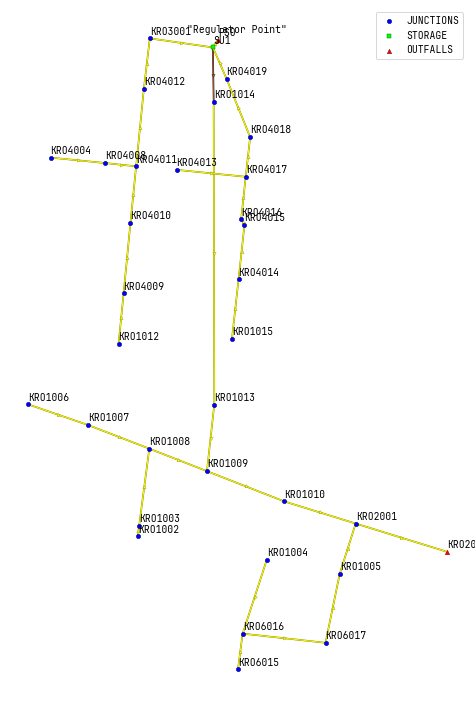

In [57]:
fig, ax = init_empty_map_plot()
add_link_map(ax, inp, add_arrows=True)
add_node_map(ax, inp)
add_node_labels(ax, inp, ha='left', y_offset=15, in_layout=False)
add_labels(ax, inp)
fig.set_dpi(70)
fig.set_size_inches(10, 10)

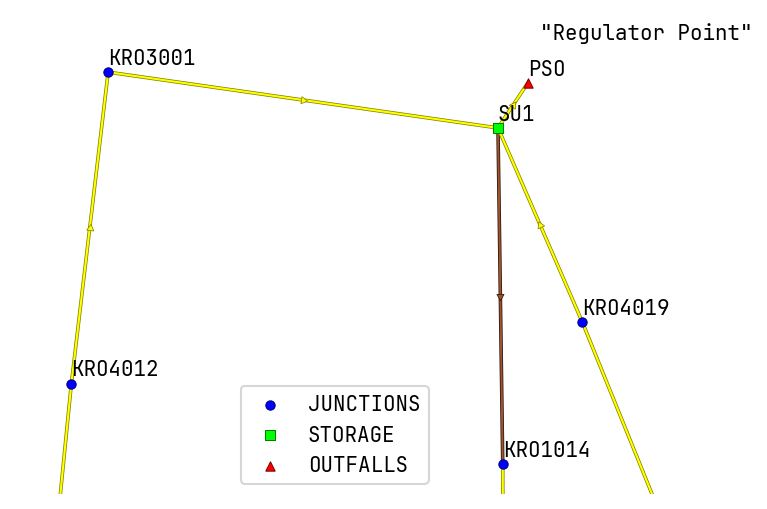

In [62]:
fig, ax = init_empty_map_plot()
add_link_map(ax, inp, add_arrows=True)
add_node_map(ax, inp)
add_node_labels(ax, inp, ha='left', y_offset=5, in_layout=False)
add_labels(ax, inp)
ax.set_ylim(430_850, 431_150)
ax.set_xlim(1_362_350, 1_362_750)
fig.set_size_inches(5, 5)
fig.set_dpi(150)
# ax.set_axis_on()
# ax.set_aspect('auto')
# from matplotlib._layoutgrid import plot_children
# plot_children(fig)

In [64]:
inp.PUMPS['PUMP1']

Pump(name='PUMP1', from_node='SU1', to_node='KRO1014', curve_name='PUMP_CURVE1', status='ON', depth_on=0.0, depth_off=0.0)

In [68]:
inp.CURVES['PUMP_CURVE1']

Curve(name='PUMP_CURVE1', kind='PUMP4', points=[[0, 0.45], [4, 0.45], [4.75, 0.9]])

In [66]:
inp.STORAGE['SU1']

Storage(name='SU1', elevation=544.74, depth_max=17.0, depth_init=0.0, kind='FUNCTIONAL', data=[12.566, 0.0, 0.0], depth_surcharge=0.0, frac_evaporation=0.0, suction_head=nan, hydraulic_conductivity=nan, moisture_deficit_init=nan)

In [70]:
print(inp.CONTROLS.to_inp_lines())

RULE PUMP1A
IF NODE SU1 DEPTH >= 4
THEN PUMP PUMP1 STATUS = ON
PRIORITY 1

RULE PUMP1B
IF NODE SU1 DEPTH < 1
THEN PUMP PUMP1 STATUS = OFF
PRIORITY 1




In [74]:
dwf = inp.PATTERNS['DWF']
dwf

Pattern(name='DWF', cycle='HOURLY', factors=[0.0151, 0.01373, 0.01812, 0.01098, 0.01098, 0.01922, 0.02773, 0.03789, 0.03515, 0.03982, 0.02059, 0.02471, 0.03021, 0.03789, 0.0335, 0.03158, 0.03954, 0.02114, 0.02801, 0.0368, 0.02911, 0.02334, 0.02499, 0.02718])

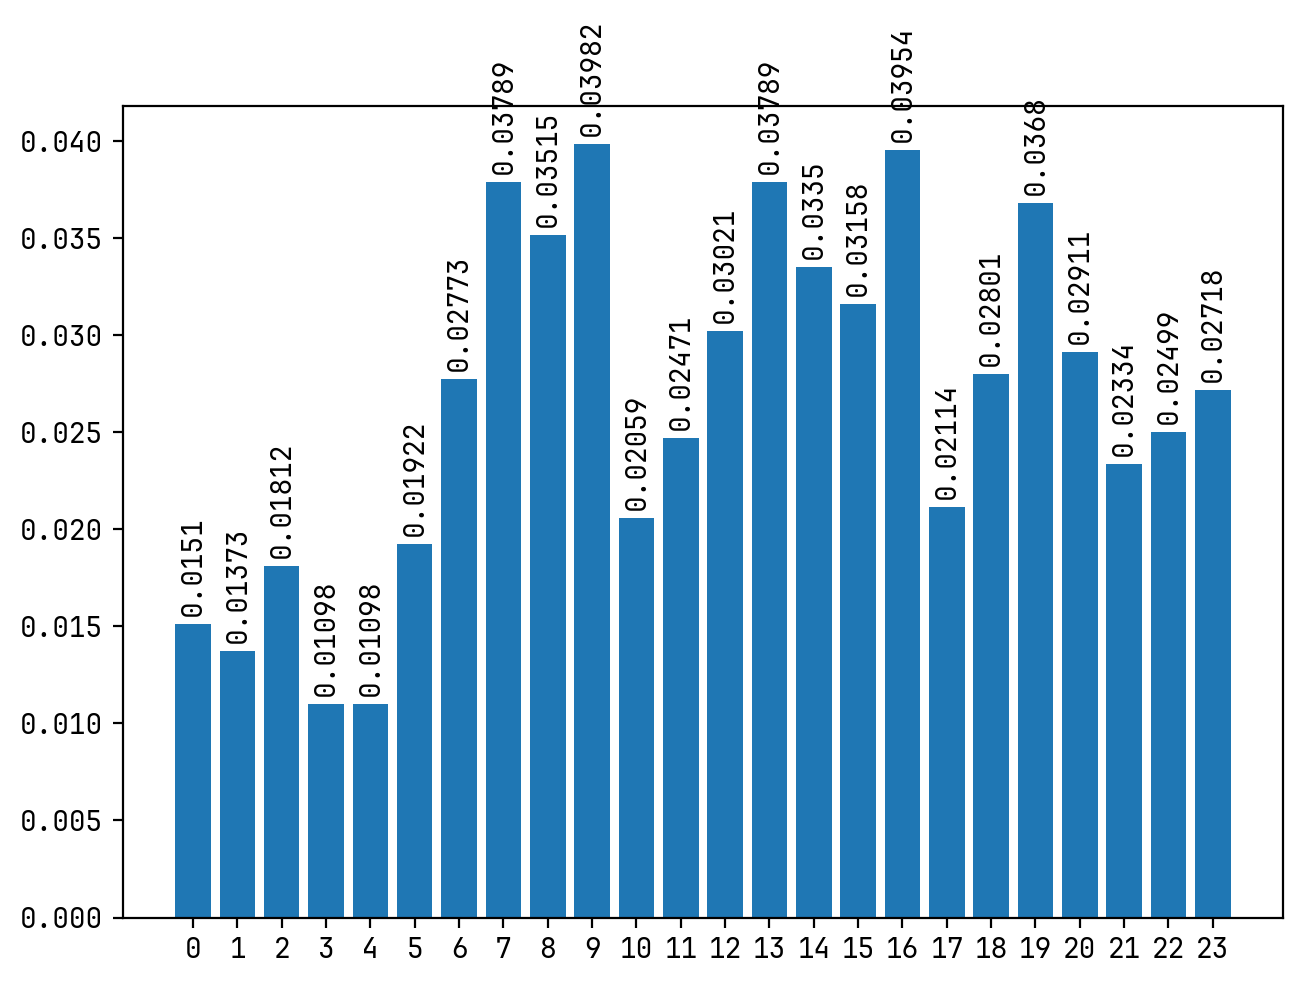

In [83]:
fig, ax = plt.subplots()
x = list(range(len(dwf.factors)))
rects = ax.bar(x, dwf.factors)
ax.set_xticks(x)
_ = ax.bar_label(rects, padding=3, rotation=90)

In [86]:
with swmm5_run_temporary(inp.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmpx17j6o2q/example_run_swmm.inp:   0%|          | 0/10…

4. Create one time series plot of water depth at the storage node
   and another for flow in the pump. With both plots visible,
   select Window | Tile so that they can both be viewed without
   any overlap. See if the plots reflect the desired control rules.

Text(0.5, 1.0, 'Flow in the pump')

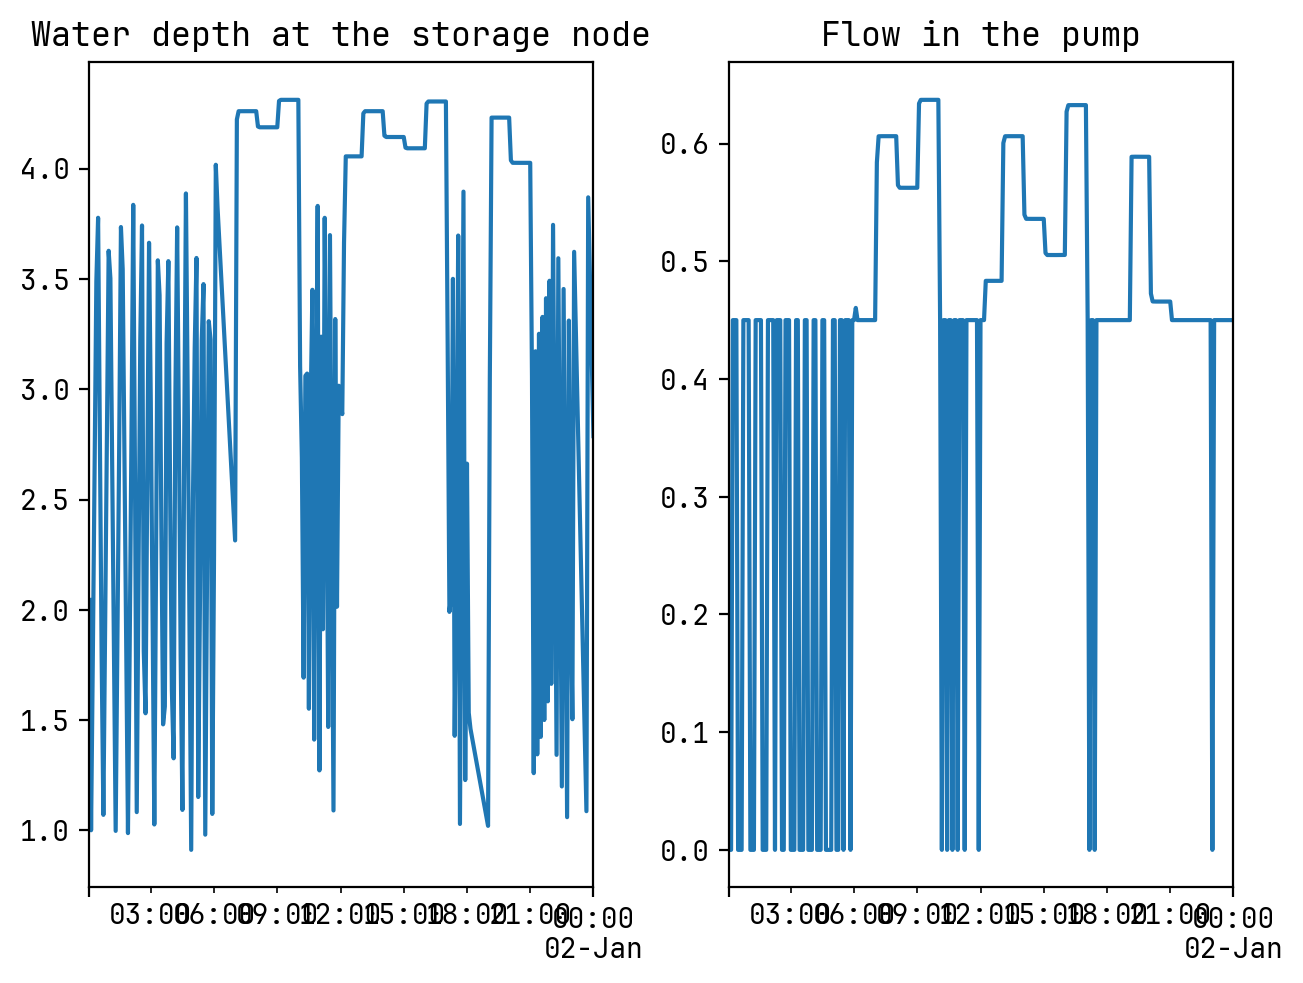

In [88]:
fig, (ax_l, ax_r) = plt.subplots(ncols=2)

out.get_part(OBJECTS.NODE, 'SU1', VARIABLES.NODE.DEPTH).plot(ax=ax_l)
ax_l.set_title('Water depth at the storage node')
out.get_part(OBJECTS.LINK, 'PUMP1', VARIABLES.LINK.FLOW).plot(ax=ax_r)
ax_r.set_title('Flow in the pump')

5. Create a scatter plot of pump flow versus water depth in the
   storage node and note how this plot is faithful to the control
   rules and to the pump's operating curve.

Text(0.5, 0, 'Flow in the pump')

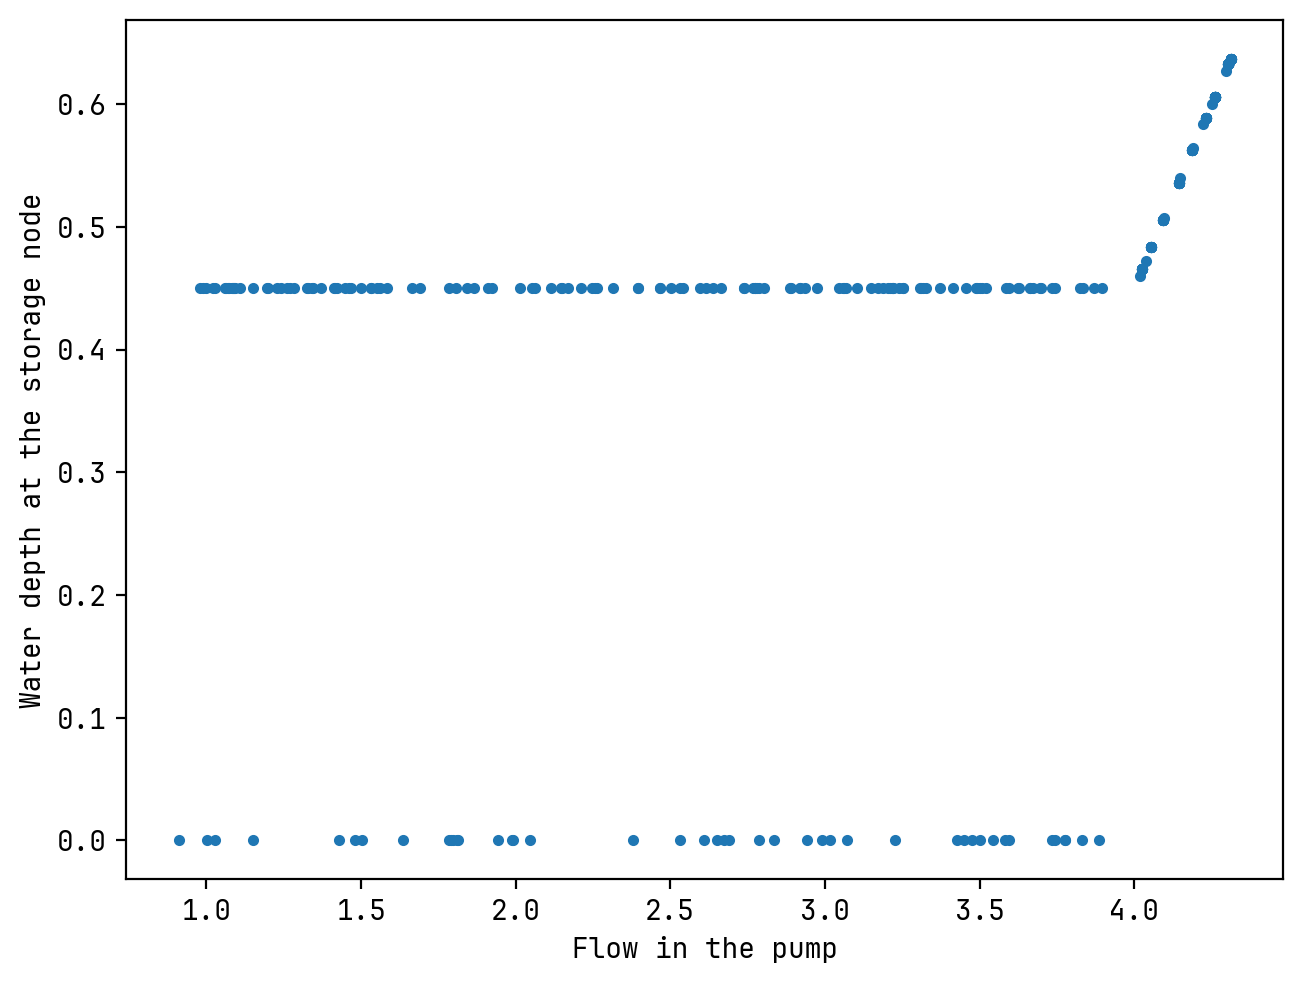

In [91]:
fig, ax = plt.subplots()

ax.plot(out.get_part(OBJECTS.NODE, 'SU1', VARIABLES.NODE.DEPTH), out.get_part(OBJECTS.LINK, 'PUMP1', VARIABLES.LINK.FLOW), lw=0, marker='.')
ax.set_ylabel('Water depth at the storage node')
ax.set_xlabel('Flow in the pump')